In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt 
import seaborn as sns  

import pickle

import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

from sklearn.preprocessing import StandardScaler  # Standardizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # One hot Encoder
from scipy.sparse import csr_matrix  # For sparse matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Logistic Regression
from sklearn.svm import LinearSVC  # SVM
from sklearn.tree import DecisionTreeClassifier  #DecisionTree
from sklearn.ensemble import RandomForestClassifier  # RandomForest
import xgboost as xgb  #XGB

from sklearn.metrics import classification_report, roc_auc_score, f1_score

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer  # Scoring functions
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score  # Scoring fns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Cross validation

%matplotlib inline

In [2]:
file_path = "./final-ipynb"

In [3]:
# Cargar datos de test y train
x_train, y_train = pickle.load(open(file_path+'/final_train.pkl', 'rb'))
x_test, y_test = pickle.load(open(file_path+'/final_test.pkl', 'rb'))

# Diccionarios
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))
mode_dict = pickle.load(open(file_path+'/mode_dict.pkl', 'rb'))

# Standard scaler
scaler = pickle.load(open(file_path+'/scaler.pkl', 'rb'))

# Encoders one-hot
ohe_proto = pickle.load(open(file_path+'/ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path+'/ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path+'/ohe_state.pkl', 'rb'))

In [4]:
x_train.head()

,sttl,dttl,swin,trans_depth,res_bdy_len,stime,sintpkt,dintpkt,tcprtt,synack,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,2.561444,-0.717760,-1.196045,-0.225343,-0.089113,-1.172764,-0.057567,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.037542,-0.717760,-1.196045,-0.225343,-0.089113,0.868469,-0.069616,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.157401,-0.069485,-0.054857,-0.121383,-0.107394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.136357,-0.063807,-0.044512,-0.120830,-0.107159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.144197,-0.069180,-0.054358,-0.123351,-0.110421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Crear la matriz dispersa de train
x_train_csr = csr_matrix(x_train.values)

col = x_train.columns

x_train = pd.DataFrame.sparse.from_spmatrix(x_train_csr, columns=col)

In [6]:
pickle.dump((x_train, y_train), open(file_path+'/train_sparse.pkl', 'wb'))

x_train, y_train = pickle.load(open(file_path+'/train_sparse.pkl', 'rb'))

In [7]:
x_train.sparse.to_dense().head()

,sttl,dttl,swin,trans_depth,res_bdy_len,stime,sintpkt,dintpkt,tcprtt,synack,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,2.561444,-0.717760,-1.196045,-0.225343,-0.089113,-1.172764,-0.057567,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.037542,-0.717760,-1.196045,-0.225343,-0.089113,0.868469,-0.069616,-0.055099,-0.136439,-0.128893,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.157401,-0.069485,-0.054857,-0.121383,-0.107394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.136357,-0.063807,-0.044512,-0.120830,-0.107159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.426051,-0.041365,0.836096,-0.225343,-0.089113,-1.144197,-0.069180,-0.054358,-0.123351,-0.110421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x_train.shape, y_train.shape

((1778032, 196), (1778032,))

In [9]:
#Limpieza de datos

def clean_data(data):

    #Elimina los valores nulos y erróneos 
    
    numerical_col = data.select_dtypes(include=np.number).columns 
    categorical_col = data.select_dtypes(exclude=np.number).columns
    
    # Cleaning the data
    for col in data.columns:
        val = mode_dict[col]  # Sustituye los valores nulos por el valor modal
        data[col] = data[col].fillna(value=val)
        data[col] = data[col].replace(' ', value=val)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)

        # Si son binarias y el valor es >1 se sustituye por el valor modal
        if col in saved_dict['binary_col']:
            data[col] = np.where(data[col]>1, val, data[col])

    # Convertir columnas de tipo erróneo
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    for bad_col in bad_dtypes:
        data[col] = data[col].astype(float)
    
    return data


#Aplicar log1p

def apply_log1p(data):
    
    #Ejecuta el log1p, crea una nueva columna y elimina la original
    
    for col in saved_dict['log1p_col']:
        new_col = col + '_log1p'
        data[new_col] = data[col].apply(np.log1p)
        data.drop(col, axis=1, inplace=True)
    return data

#Estandarizar los valores

def standardize(data):
    
    #Estandariza las columnas numéricas
    
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data


#Encoders one-hot para las columnas categóricas

def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))
    
    #Incluir las columnas con el encoder y eliminar las originales
    
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)
    
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)
    return data

In [10]:
def get_final_data(data, saved_dict=saved_dict, mode_dict=mode_dict):
    
    # Convierte unos datos de entrada a los valores adecuados
    
    data.reset_index(drop=True, inplace=True)
    data.columns = saved_dict['columns']
    
    
    dropable_col = saved_dict['to_drop'] + saved_dict['corr_col']
    data.drop(columns=dropable_col, inplace=True)
    
    data = clean_data(data)
    data = apply_log1p(data)
    data = standardize(data)
    data = ohencoding(data)
    
    return data

In [11]:
# Convierte los datos test a los valores adecuados

x_test = get_final_data(x_test)
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [12]:
# Crear la matriz dispersa de test
x_test_csr = csr_matrix(x_test.values)

col = x_test.columns

x_test = pd.DataFrame.sparse.from_spmatrix(x_test_csr, columns=col)

In [13]:
x_train.shape, y_train.shape

((1778032, 196), (1778032,))

In [14]:
x_test.shape, y_test.shape

((762015, 196), (762015,))

In [15]:
all(x_train.columns == x_test.columns)

True

In [22]:
def false_alarm_rate(y_true, y_pred):
    
    cm = confusion_matrix(y_true, y_pred)
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tn = cm.sum() - (fp + fn + np.diag(cm))
    
    # False Positive Rate (FPR) = FP / (FP + TN)
    fpr = fp / (fp + tn)
    
    # Weighted Average False Positive Rate
    weighted_fpr = np.sum(fpr * (np.sum(cm, axis=1) / np.sum(cm)))
    
    return weighted_fpr

In [23]:
#Función para ajustar los hiperparámetros
    
def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):
    # Inicialización
    scoring = {'accuracy': make_scorer(accuracy_score),
               'f1_weighted': make_scorer(f1_score, average='weighted')}  # Agrega otras métricas según sea necesario
    
    # Copia modificable de los datos de entrada
    x_copy = x.copy()
    y_copy = y.copy()

    # Ajuste de los parámetros
    if method == 'gridsearch':
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='accuracy',
                                  cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x_copy, y_copy)
    elif method == 'randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='accuracy',
                                        cv=cv, verbose=3, return_train_score=True,
                                        random_state=check_random_state(42))
        result = tuning_clf.fit(x_copy, y_copy)

    return result

In [24]:
#Función para mostrar los resultados del ajuste de hiperparámetros

def result_visualization(tuned_clf, parameters, param1=None, param2=None):
    
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    print("Mejor puntuación: {}".format(tuned_clf.best_score_))
    print("Mejores parámetros: {}".format(tuned_clf.best_params_))

    # Visualizar putnuación con dos parámetros
    
    if param2 is not None:
        
        # Mapa de calor
        
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")
        
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)
        
        # Mapa de calor de train
        
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # Mapa de calor de test
        
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # axis labels and plot title
        train_ax.set_title("Mapa de calor hiperparámetros train ")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Mapa de calor hiperparámetros test")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()
    
    # Visualizar la puntuación con un solo parámetro
    
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Datos de train
        
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))
        
        # Datos de test
        
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))
        
        plt.xlabel(param1)
        plt.ylabel('Rendimiento')
        plt.grid()
        plt.legend()
        plt.show()

In [25]:
#Función para evaluar el rendimiento

def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):

    cmap=sns.light_palette("blue")
    
    # Entrenamiento del mejor modelo
    
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    #Calculo de métricas de evaluación
    
    train_classification_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    train_auc = train_classification_report['weighted avg']['precision']
    train_f1 = train_classification_report['weighted avg']['f1-score']
    train_far = false_alarm_rate(y_train,y_train_pred)
        
    test_auc = test_classification_report['weighted avg']['precision']
    test_f1 = test_classification_report['weighted avg']['f1-score']
    test_far = false_alarm_rate(y_test,y_test_pred)
    
    # Presentar los resultados en una tabla
    
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)
    
    return clf, test_auc, test_f1, test_far

##  Logistic Regression

In [26]:
# Analizando los resultados el mejor clasificador es alpha 0.0001 y l2

lr_bst_clf = SGDClassifier(penalty='l2', alpha=0.0001)

In [27]:
# Obtener el mejor modelo de LR con train y test

x_train_copy = x_train.copy()
y_train_copy = y_train.copy()

lr_clf, lr_auc, lr_f1, lr_far = evaluate_result(lr_bst_clf, x_train_copy, y_train_copy, x_test, y_test, 'LR')

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |   LR  | 0.9726557183892515 | 0.9709330195630435 | 0.049973906707367045 |
|   Test  |   LR  | 0.9729254876413245 | 0.9713288586324813 | 0.04982312011659345  |
+---------+-------+--------------------+--------------------+----------------------+


In [28]:
result_dict = {"name":[], "auc":[], "f1":[], "far":[]}

In [29]:
# Almacenar los resultados del LR

result_dict['name'].append("LR")
result_dict['auc'].append(lr_auc)
result_dict['f1'].append(lr_f1)
result_dict['far'].append(lr_far)

In [30]:
pickle.dump(lr_clf, open(file_path+'/lr_clf.pkl', 'wb'))

In [31]:
result_dict

{'name': ['LR'],
 'auc': [0.9729254876413245],
 'f1': [0.9713288586324813],
 'far': [0.04982312011659345]}

##  Linear SVM

In [32]:
# El mejor clasificador es con penalty l2 y alpha 1e-05

best_svm_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-5)

In [33]:
# Obtener el mejor modelo de lineal SVM con train y test

y_train_copy = y_train.copy()
svm_clf, svm_auc, svm_f1, svm_far = evaluate_result(best_svm_clf, x_train_csr, y_train_copy, x_test_csr, y_test, "SVM")

+---------+-------+--------------------+--------------------+---------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate  |
+---------+-------+--------------------+--------------------+---------------------+
|  Train  |  SVM  | 0.9703914779445921 | 0.9674100155909057 | 0.05680718992619756 |
|   Test  |  SVM  | 0.970097598312609  | 0.967379746186299  | 0.05849404836463991 |
+---------+-------+--------------------+--------------------+---------------------+


In [34]:
# Almacenar los resultados

result_dict['name'].append("SVM")
result_dict['auc'].append(svm_auc)
result_dict['f1'].append(svm_f1)
result_dict['far'].append(svm_far)

In [35]:
pickle.dump(svm_clf, open(file_path+'/svm_clf.pkl', 'wb'))

In [36]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

## Decision tree

In [37]:
# El mejor clasificador es con max_depth 10, min_samples_split 6 y min_samples_leaf 11

dt_param = {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf':11}

dt_best_clf = DecisionTreeClassifier(**dt_param)

In [38]:
# Obtener el mejor modelo de DT con train y test

y_train_copy = y_train.copy()
dt_clf, dt_auc, dt_f1, dt_far = evaluate_result(dt_best_clf, x_train_csr, y_train_copy, x_test_csr, y_test, 'DT')

+---------+-------+--------------------+--------------------+---------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate  |
+---------+-------+--------------------+--------------------+---------------------+
|  Train  |   DT  | 0.9781531245598295 | 0.9763611176657858 |  0.0519545581500037 |
|   Test  |   DT  | 0.9780751415338191 | 0.9763337724343388 | 0.05229669117611157 |
+---------+-------+--------------------+--------------------+---------------------+


In [39]:
pickle.dump(dt_clf, open(file_path+'/dt_clf.pkl', 'wb'))

In [40]:
result_dict = pickle.load(open('./result_dict.pkl', 'rb'))

In [41]:
# Almacenar los resultados del DT

result_dict['name'].append("DT")
result_dict['auc'].append(dt_auc)
result_dict['f1'].append(dt_f1)
result_dict['far'].append(dt_far)

In [42]:
pickle.dump(result_dict, open(file_path+'/result_dict.pkl', 'wb'))

In [43]:
result_dict

{'name': ['LR', 'SVM', 'DT'],
 'auc': [0.9729254876413245, 0.970097598312609, 0.9780751415338191],
 'f1': [0.9713288586324813, 0.967379746186299, 0.9763337724343388],
 'far': [0.04982312011659345, 0.05849404836463991, 0.05229669117611157]}

## Cross Validation function

In [44]:
#Dvidir los datos para train y validación cruzada 

x_train_new_csr, x_cv_csr, y_train, y_cv = train_test_split(x_train_csr, y_train, test_size=0.2, random_state=42)

In [45]:
x_train_new_csr.shape, y_train.shape, x_cv_csr.shape, y_cv.shape, x_test_csr.shape, y_test.shape

((1422425, 196),
 (1422425,),
 (355607, 196),
 (355607,),
 (762015, 196),
 (762015,))

In [46]:
#Función para realizar la validación cruzada con varios valores de un hiperparámetro a un clasificador

def cross_validation(clf_name, param, param_tune,
                     x_train=x_train_new_csr, y_train=y_train, x_cv=x_cv_csr, y_cv=y_cv):
    #Inicialización
    
    train_metrics_list = []
    cv_metrics_list = []
    hyper_param = param_tune
    values = param.pop(hyper_param)
    classifier = clf_name

    # Iteraciones con los diferentes valores del hiperparámetro
    
    for i in tqdm(values):
        
        #Entrenar el clasficador
    
        clf = classifier(**{hyper_param:i}, **param, n_jobs=-1)
        clf.fit(x_train, y_train)

        # Realizar predicciones de probabilidad
        
        y_train_pred = clf.predict_proba(x_train)[:,1]
        y_cv_pred = clf.predict_proba(x_cv)[:,1]

        # Obtener los resultados
         
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        
        cv_precision = precision_score(y_cv, y_cv_pred, average='weighted')
        
        train_metrics_list.append((train_precision))
        cv_metrics_list.append((cv_precision))

        print("Para unos valores {}: {}, train auc: {} and test auc {}".format(hyper_param, i, train_precision,cv_precision))
    
    plt.figure(figsize=(10,5))
    plt.plot(values, train_metrics_list, label="train")
    plt.plot(values, cv_metrics_list, label="cv")

    for i, txt in enumerate(train_metrics_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], train_metrics_list[i]))
    for i, txt in enumerate(cv_metrics_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], cv_metrics_list[i]))
    
    plt.xlabel(hyper_param)
    plt.ylabel('Puntuación')
    plt.grid()
    plt.legend()
    plt.show()

    # Búsqueda del clasificador con mejores resultados
    
    best_param = np.argmax(cv_metrics_list)
    clf = classifier(**{hyper_param:values[best_param]}, **param)

    return clf, hyper_param, values[best_param]

## Random Forest

In [47]:
# El mejor clasificador a partir de los resultados obtenidos 

rf_bst_clf = RandomForestClassifier(criterion='gini', max_depth=24, min_samples_split=2, n_estimators=300, n_jobs=-1)

In [48]:
# Obtener los resultados con el clasificador
rf_clf, rf_auc, rf_f1, rf_far = evaluate_result(rf_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "RF")

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |   RF  | 0.989839119217008  | 0.9882149536059927 | 0.011682453056968205 |
|   Test  |   RF  | 0.9797187382462964 | 0.9791354702617631 | 0.031545928694792405 |
+---------+-------+--------------------+--------------------+----------------------+


In [49]:
pickle.dump(rf_clf, open(file_path+'/rf_best_clf.pkl', 'wb'))

In [50]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [51]:
# Almacenar los resultados del clasificador RF

result_dict['name'].append("RF")
result_dict['auc'].append(rf_auc)
result_dict['f1'].append(rf_f1)
result_dict['far'].append(rf_far)

In [52]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.972925,0.971329,0.049823
1,SVM,0.970098,0.967380,0.058494
2,RF,0.979719,0.979135,0.031546


In [53]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

## GBDT

In [54]:
# El mejor clasificador a partir de los resultados obtenidos 

best_params = {'n_estimators':400,
               'max_depth':12,
               'learning_rate':0.1,
               'colsample_bylevel':0.5,
               'subsample':0.1,
               'n_jobs':-1}

xgb_bst_clf = xgb.XGBClassifier(**best_params)

In [55]:
xgb_clf, xgb_auc, xgb_f1, xgb_far = evaluate_result(xgb_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "GBDT")

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |  GBDT | 0.9886290010798995 | 0.9879234125521299 | 0.008320740907168798 |
|   Test  |  GBDT | 0.979917856546555  | 0.9797192600591759 | 0.026247048115416022 |
+---------+-------+--------------------+--------------------+----------------------+


In [56]:
pickle.dump(xgb_clf, open(file_path+'/xgb_bst_clf.pkl', 'wb'))

In [57]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [58]:
# Almacenar los resultados del clasificador RF

result_dict['name'].append("GBDT")
result_dict['auc'].append(xgb_auc)
result_dict['f1'].append(xgb_f1)
result_dict['far'].append(xgb_far)

In [59]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.972925,0.971329,0.049823
1,SVM,0.970098,0.967380,0.058494
2,RF,0.979719,0.979135,0.031546
3,GBDT,0.979918,0.979719,0.026247


In [60]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

## Modelos con las mejores características 

In [61]:
RF_clf = pickle.load(open(file_path+'/rf_best_clf.pkl', 'rb'))

In [62]:
# Todas las características con importancia

np.count_nonzero(RF_clf.feature_importances_)

196

In [63]:
# Getting the indices of the features sorted in descending order

indices = np.argsort(-1 * abs(RF_clf.feature_importances_))[:55]

In [64]:
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))

In [65]:
saved_dict['imp_indices'] = indices

In [66]:
pickle.dump(saved_dict, open(file_path+'/saved_dict.pkl', 'wb'))

In [67]:
x_train_new_csr[:,indices].shape

(1422425, 55)

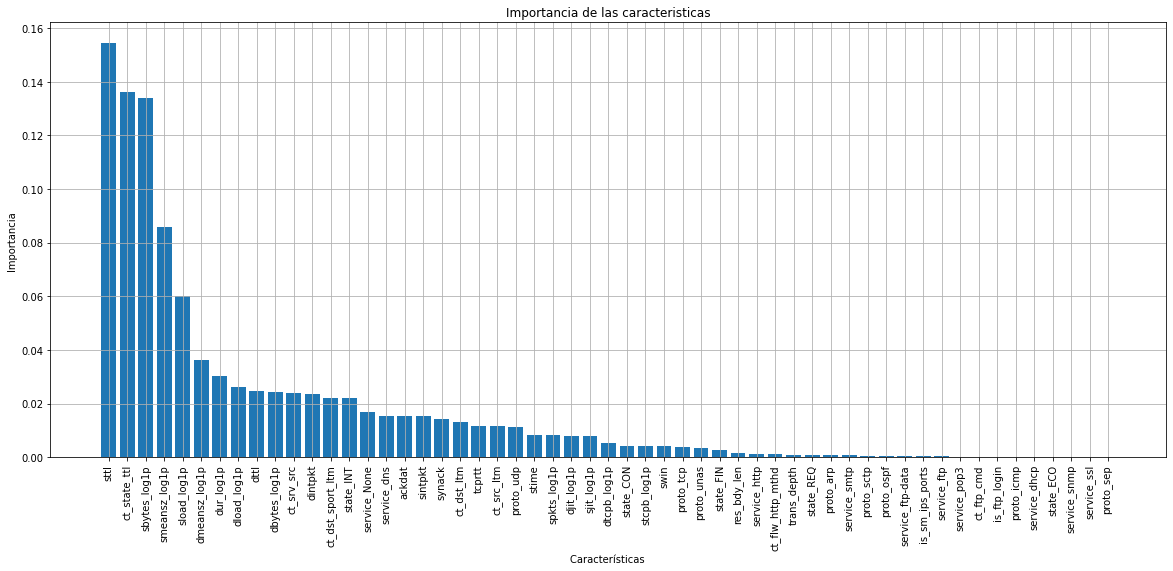

In [68]:
plt.figure(figsize=(20,8))
plt.bar(x_train.columns[indices], abs(RF_clf.feature_importances_[indices]))
plt.xticks(rotation=90)
plt.xlabel("Características ")
plt.ylabel("Importancia")
plt.title("Importancia de las caracteristicas")
plt.grid()
plt.show()

## Random Forest con características importantes

In [71]:
# Configurar clasificador RF

rf_clf_imp = RandomForestClassifier(criterion='gini', max_depth=24, min_samples_split=2, n_estimators=300, n_jobs=-1)

In [72]:
# Obtener los resultados con el clasificador pasando solo las características importantes

rf_clf_imp, rf_fi_auc, rf_fi_f1, rf_fi_far = evaluate_result(rf_clf_imp, x_train_new_csr[:,indices], y_train, x_test_csr[:,indices], y_test, 'RF_FI')

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  | RF_FI | 0.9880931386856419 | 0.9870526450133352 | 0.01567223744495252  |
|   Test  | RF_FI | 0.9802553464507507 | 0.9799251728867574 | 0.030341987146500937 |
+---------+-------+--------------------+--------------------+----------------------+


In [73]:
pickle.dump(rf_clf_imp, open(file_path+'/rf_clf_imp.pkl', 'wb'))

In [74]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [75]:
#Almacenar los resultados

for i,j in zip(result_dict.keys(), ["RF_FI", rf_fi_auc, rf_fi_f1, rf_fi_far]):
    result_dict[i].append(j)

In [76]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.972925,0.971329,0.049823
1,SVM,0.970098,0.967380,0.058494
2,RF,0.979719,0.979135,0.031546
3,GBDT,0.979918,0.979719,0.026247
4,RF_FI,0.980255,0.979925,0.030342


## Decision tree con características importantes

In [77]:
# Configurar clasificador DT

dt_clf_imp = DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=11)

In [78]:
# Obtener los resultados con el clasificador pasando solo las características importantes

dt_clf_imp, dt_fi_auc, dt_fi_f1, dt_fi_far = evaluate_result(dt_clf_imp, x_train_new_csr[:,indices], y_train, x_test_csr[:,indices], y_test, 'DT_FI')

+---------+-------+--------------------+--------------------+---------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate  |
+---------+-------+--------------------+--------------------+---------------------+
|  Train  | DT_FI | 0.9770006975338749 | 0.9762727379731393 | 0.05319963354569822 |
|   Test  | DT_FI | 0.977133658714513  | 0.9761403700939925 | 0.05373419020535561 |
+---------+-------+--------------------+--------------------+---------------------+


In [79]:
pickle.dump(dt_clf_imp, open(file_path+'/dt_clf_imp.pkl', 'wb'))

In [80]:
#Almacenar los resultados

for i,j in zip(result_dict.keys(), ["DT_FI", dt_fi_auc, dt_fi_f1, dt_fi_far]):
    result_dict[i].append(j)

In [81]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,LR,0.972925,0.971329,0.049823
1,SVM,0.970098,0.967380,0.058494
2,RF,0.979719,0.979135,0.031546
3,GBDT,0.979918,0.979719,0.026247
4,RF_FI,0.980255,0.979925,0.030342
5,DT_FI,0.977134,0.976140,0.053734


In [82]:
pickle.dump(result_dict, open(file_path+'/final_result_dict.pkl', 'wb'))